## Ocean Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288910,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704596,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
# For plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

## Train- Test Splitting 

In [10]:
 # For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed((42))
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    train_indices = shuffled[:test_set_size]  
    test_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]


In [11]:
#train_set, test_set = split_train_test(housing, 0.2)

In [12]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")


In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")


Rows in train set: 404
Rows in test set: 102



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]



In [15]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [16]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283625,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715406,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [17]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [18]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [19]:
strat_train_set['CHAS'].value_counts()


CHAS
0    376
1     28
Name: count, dtype: int64

In [20]:
# 95/7

In [21]:
# 376/28

## Looking for Correlations

In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695828
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [23]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695828
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

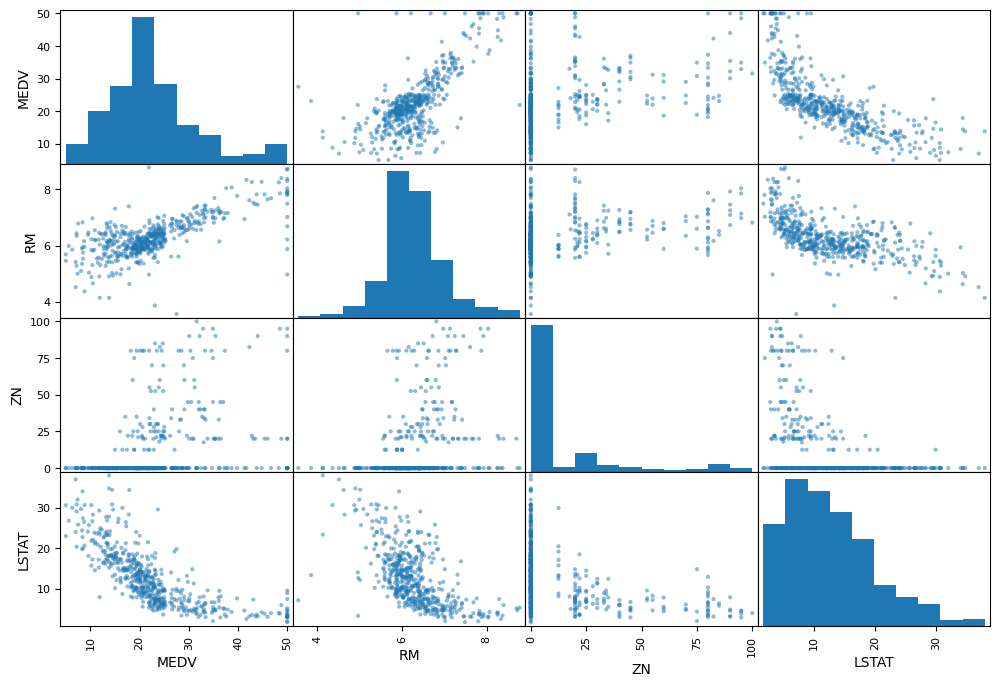

In [24]:
from pandas.plotting import scatter_matrix
attributes =["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

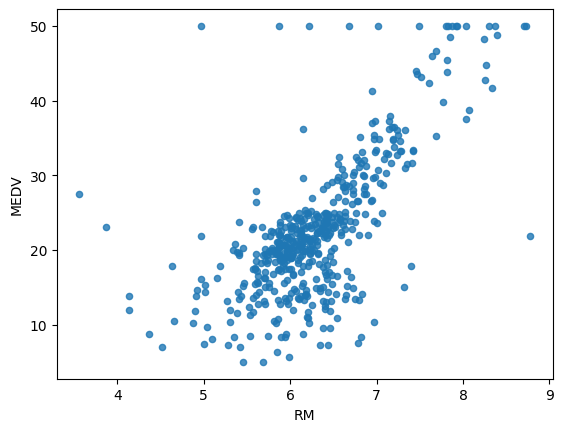

In [25]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations

In [26]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [27]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [28]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695828
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.539238
LSTAT     -0.737663
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

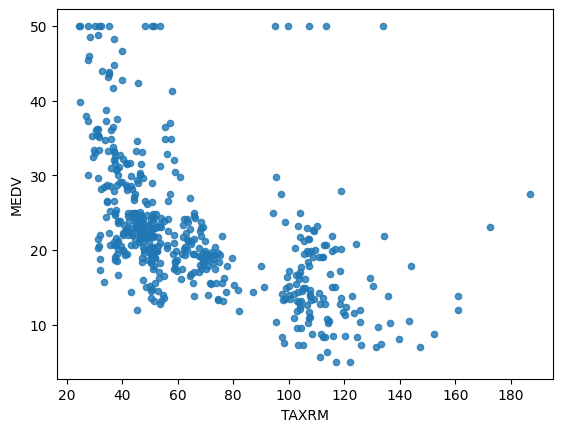

In [29]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [30]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [31]:
# To take care of missing attributes, you have three options:
#  1. Get rid of the missing data points
#  2. Get rid of the whole attributes
#  3. Set the value to some value(0, mean or median)

In [32]:
# Option 1 (original not changed)
a=housing.dropna(subset=["RM"])
a.shape

(400, 13)

In [33]:
# Option 2 (original not changed)
housing.drop("RM", axis=1).shape
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [34]:
# Compute median for Option 3
median = housing["RM"].median()

In [35]:
median

6.2175

In [36]:
# Option 3
housing["RM"].fillna(median)
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
housing.shape

(404, 13)

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [40]:
imputer.statistics_.shape

(13,)

In [41]:
X = imputer.transform(housing)

In [42]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282970,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711877,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.884750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators
2. Tranformers
3. Predictors

## Feature Scaling

  ## Creating Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #...add as many as you want in your pipeline
    ('std_scalar', StandardScaler()),
])

In [45]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [46]:
housing_num_tr
# It's numpy array

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [47]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Ocean Real Estates

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)


RandomForestRegressor()

In [49]:
print(housing_labels)

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64


In [50]:
some_data = housing.iloc[:5]

In [51]:
some_labels =  housing_labels.iloc[:5]

In [52]:
prepared_data = my_pipeline.transform(some_data)

In [53]:
model.predict(prepared_data)

array([22.481, 25.576, 16.492, 23.404, 23.527])

In [54]:
print(model.predict(prepared_data))

[22.481 25.576 16.492 23.404 23.527]


In [55]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [56]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [57]:
from sklearn.metrics  import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse= np.sqrt(mse)



In [58]:
# Here's erroe is 23.___ and its heavy error so we will discard this linear regression model and run again after importing decision tree

In [59]:
rmse


1.2150262882703888

In [60]:
# Here 0 error it means here's overfitting of data, that means it has learned noise and understood the data very deeply. We want our model to learn trend, not the noise.

In [61]:
# We shouldn't do anything with our test set until and unless we are ready to launch a model.

## Using better evaluation technique - Cross Validation

In [62]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring= "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [63]:
rmse_scores

array([2.73070707, 2.86340523, 4.3221839 , 2.82221593, 3.41207205,
       2.61227922, 4.82673211, 3.40795321, 3.42661075, 3.23653879])

In [64]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [65]:
print_scores(rmse_scores)

Scores: [2.73070707 2.86340523 4.3221839  2.82221593 3.41207205 2.61227922
 4.82673211 3.40795321 3.42661075 3.23653879]
Mean: 3.3660698252877133
Standard deviation: 0.6776678527159291


In [66]:
# We will use joblib for launching model, for dumping the model.

## Saving the model

In [67]:
from joblib import dump, load
dump(model, 'Ocean.joblib')

['Ocean.joblib']

## Testing the model on test data

In [68]:
X_test= strat_test_set.drop("MEDV",  axis=1)
Y_test = strat_test_set ["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [69]:
final_rmse

2.897951511116829

In [70]:
print(final_predictions)

[24.224 11.471 25.517 21.825 18.142 14.573 19.836 14.893 31.867 41.218
 19.551 11.629 24.046 25.517 19.448 11.296 31.532 14.075 23.583 18.979
 19.585 17.758 14.979 22.47  19.189 31.511 16.098 33.267  8.969 33.735
 23.549 21.133 22.819 11.134 20.729 10.719 43.467 24.298 23.849 42.422
 23.981 29.382 20.429 20.959 18.913 33.148 44.297 20.197 20.426 22.505
 21.311 14.371 21.45  15.383 24.805 33.57  42.354 28.883 19.707 20.83
 46.613  9.594 19.115 25.384 14.899 33.399 19.468 18.073 18.756 34.061
 28.139 22.735 21.11  22.477 34.396 12.598 15.562 20.139 20.81  21.518
 22.541 21.407 14.301 22.776 20.971 21.402 13.976 21.301 22.116 23.197
 18.544 26.941  7.439 26.134 19.169 29.543 19.953 31.502 13.952 26.725
 21.143 20.176]


In [71]:
print(final_predictions, Y_test)

[24.224 11.471 25.517 21.825 18.142 14.573 19.836 14.893 31.867 41.218
 19.551 11.629 24.046 25.517 19.448 11.296 31.532 14.075 23.583 18.979
 19.585 17.758 14.979 22.47  19.189 31.511 16.098 33.267  8.969 33.735
 23.549 21.133 22.819 11.134 20.729 10.719 43.467 24.298 23.849 42.422
 23.981 29.382 20.429 20.959 18.913 33.148 44.297 20.197 20.426 22.505
 21.311 14.371 21.45  15.383 24.805 33.57  42.354 28.883 19.707 20.83
 46.613  9.594 19.115 25.384 14.899 33.399 19.468 18.073 18.756 34.061
 28.139 22.735 21.11  22.477 34.396 12.598 15.562 20.139 20.81  21.518
 22.541 21.407 14.301 22.776 20.971 21.402 13.976 21.301 22.116 23.197
 18.544 26.941  7.439 26.134 19.169 29.543 19.953 31.502 13.952 26.725
 21.143 20.176] 342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64


In [72]:
print(final_predictions, list(Y_test))

[24.224 11.471 25.517 21.825 18.142 14.573 19.836 14.893 31.867 41.218
 19.551 11.629 24.046 25.517 19.448 11.296 31.532 14.075 23.583 18.979
 19.585 17.758 14.979 22.47  19.189 31.511 16.098 33.267  8.969 33.735
 23.549 21.133 22.819 11.134 20.729 10.719 43.467 24.298 23.849 42.422
 23.981 29.382 20.429 20.959 18.913 33.148 44.297 20.197 20.426 22.505
 21.311 14.371 21.45  15.383 24.805 33.57  42.354 28.883 19.707 20.83
 46.613  9.594 19.115 25.384 14.899 33.399 19.468 18.073 18.756 34.061
 28.139 22.735 21.11  22.477 34.396 12.598 15.562 20.139 20.81  21.518
 22.541 21.407 14.301 22.776 20.971 21.402 13.976 21.301 22.116 23.197
 18.544 26.941  7.439 26.134 19.169 29.543 19.953 31.502 13.952 26.725
 21.143 20.176] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [73]:
final_rmse

2.897951511116829

In [74]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24609211, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [75]:
from joblib import dump, load
import numpy as np
model = load('Ocean.joblib')

input = np.array([[-6.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.39609211, -1.31235672,  6.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

model.predict(input)

array([21.729])

In [76]:
predictions = model.predict(input)

In [77]:
from sklearn.metrics import r2_score

# Assuming you have already trained your model and obtained predictions
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)

# Calculate the R^2 score
r2score = r2_score(Y_test, final_predictions)

# Convert R^2 score to percentage
accuracy = r2score * 100

print("Accuracy:", accuracy)


Accuracy: 88.12846937244336
